# Let's chunk some books

In [1]:
# imports and setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os 

# import and instanciate config file to get access to paths
os.chdir(os.path.dirname(os.getcwd()))
from config.config import Config
config = Config()

# import utils functions
from src.utils.chunkify import save_all_books_to_dataframe

### We get the list of our picked 10 authors in 01_exploration_raw_data.ipynb

In [2]:
most_famous = ['Shakespeare William',
'Montgomery L. M. (Lucy Maud)',
'Wilde Oscar',
'Dickens Charles',
'Fitzgerald F. Scott (Francis Scott)',
'Twain Mark',
'Plato',
'Homer',
'Tolstoy Leo graf',
'Austen Jane']


In [3]:
# Let's cut the books into chunks of 256 characters
df = save_all_books_to_dataframe()
df

2452 chunks created
1096 chunks created
125 chunks created
507 chunks created
572 chunks created
444 chunks created
570 chunks created
384 chunks created
3620 chunks created
21257 chunks created
1696 chunks created
148 chunks created
721 chunks created
730 chunks created
3599 chunks created
299 chunks created
519 chunks created
580 chunks created
1592 chunks created
2121 chunks created
326 chunks created
587 chunks created
531 chunks created
483 chunks created
333 chunks created
519 chunks created
671 chunks created
559 chunks created
588 chunks created
2452 chunks created
4741 chunks created
696 chunks created
273 chunks created
711 chunks created
3221 chunks created
605 chunks created
324 chunks created
3233 chunks created
697 chunks created
556 chunks created
614 chunks created
747 chunks created
185 chunks created
723 chunks created
1227 chunks created
3568 chunks created
363 chunks created
220 chunks created
499 chunks created
444 chunks created
724 chunks created
674 chunks creat

,Author,Chunk
0,Twain Mark,﻿The Project Gutenberg EBook of Chapters from ...
1,Twain Mark,tenberg License included\nwith this eBook or o...
2,Twain Mark,MY AUTOBIOGRAPHY ***\n\n\n\n\nProduced by Bets...
3,Twain Mark,-I.[1]\n\nBY MARK TWAIN.\n\n\n PREFATORY N...
4,Twain Mark,"; but, after leaving ""Pier No. 70,"" he conclud..."
...,...,...
549047,Burnett Frances Hodgson,s for current donation\nmethods and addresses....
549048,Burnett Frances Hodgson,tenberg-tm electronic\nworks.\n\nProfessor Mic...
549049,Burnett Frances Hodgson,ks with only a loose network of volunteer supp...
549050,Burnett Frances Hodgson,ep eBooks in compliance with any particular pa...


In [8]:
# filter only on the most famous authors
df = df[df['Author'].isin(most_famous)]
df

,Author,Chunk
0,Twain Mark,﻿The Project Gutenberg EBook of Chapters from ...
1,Twain Mark,tenberg License included\nwith this eBook or o...
2,Twain Mark,MY AUTOBIOGRAPHY ***\n\n\n\n\nProduced by Bets...
3,Twain Mark,-I.[1]\n\nBY MARK TWAIN.\n\n\n PREFATORY N...
4,Twain Mark,"; but, after leaving ""Pier No. 70,"" he conclud..."
...,...,...
547695,Austen Jane,and addresses. Donations are accepted in a num...
547696,Austen Jane,fessor Michael S. Hart was the originator of t...
547697,Austen Jane,lunteer support.\n\nProject Gutenberg-tm eBook...
547698,Austen Jane,with any particular paper\nedition.\n\nMost p...


In [10]:
# we got our 10 top guys
df['Author'].value_counts().head(10)

Author
Twain Mark                             89719
Shakespeare William                    75901
Dickens Charles                        60364
Tolstoy Leo graf                       42075
Homer                                  33244
Plato                                  26091
Austen Jane                            18595
Wilde Oscar                            16145
Montgomery L. M. (Lucy Maud)           15825
Fitzgerald F. Scott (Francis Scott)     6061
Name: count, dtype: int64

<Axes: xlabel='Author', ylabel='count'>

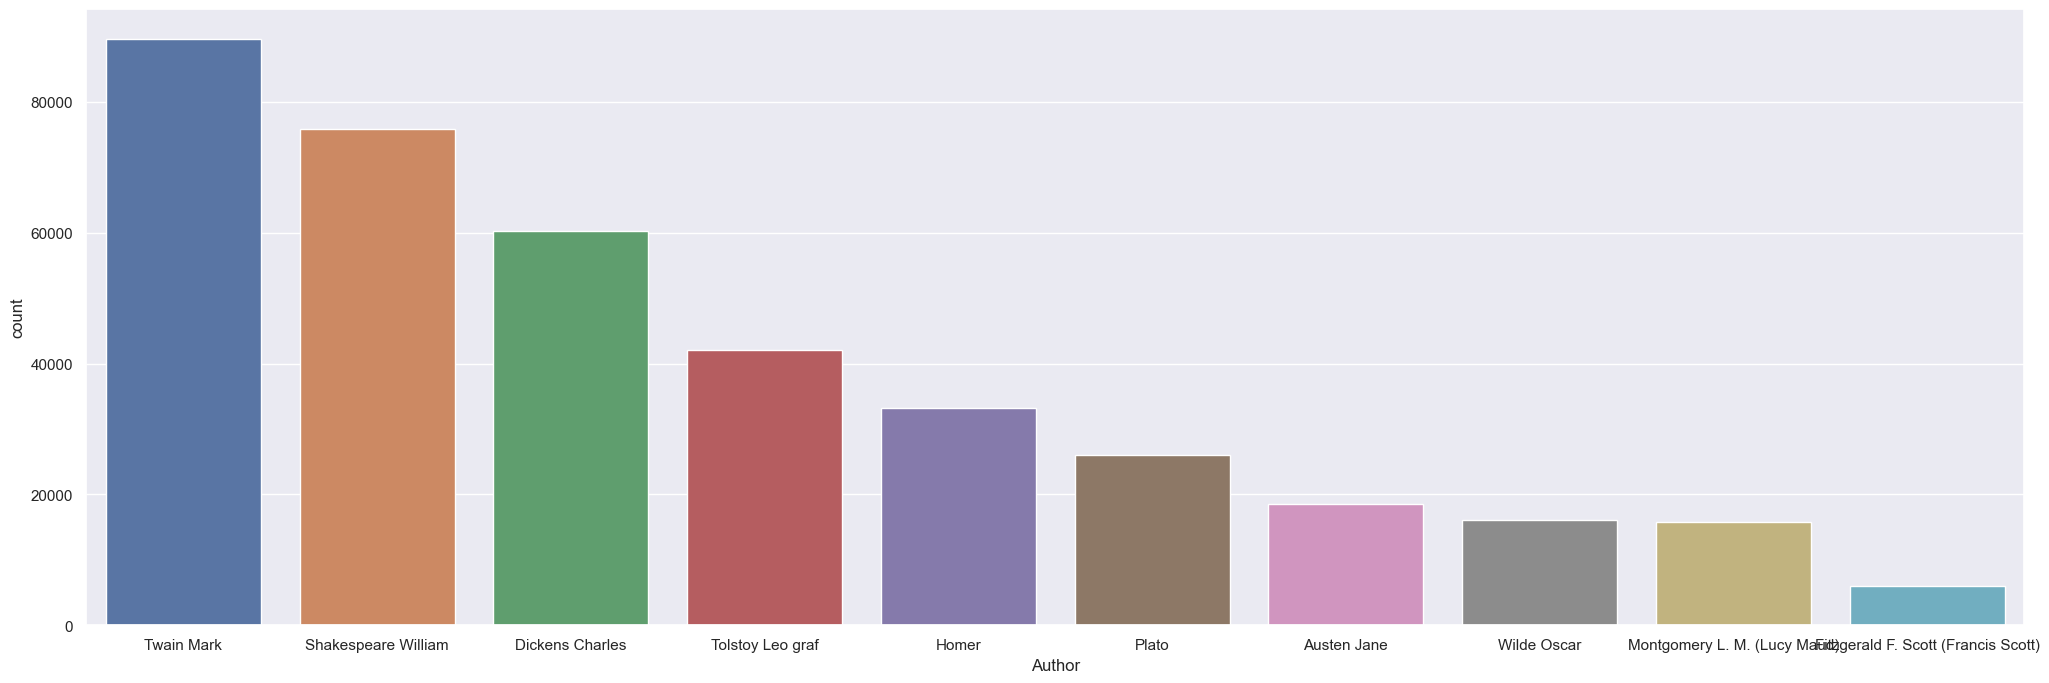

In [13]:
plt.figure(figsize=(25,8))
sns.barplot(x=df['Author'].value_counts().index, y=df['Author'].value_counts())


In [14]:
# how many chunks for the author with the least chunks?
df[df['Author'] == 'Fitzgerald F. Scott (Francis Scott)'].count()

Author    6061
Chunk     6061
dtype: int64

In [15]:
# For each author in df_chunks, we keep only 6k chunks to have a balanced dataset
df_final = pd.DataFrame()
for author in most_famous:
    df_author = df[df['Author'] == author]
    df_author = df_author[:6000]
    df_final = pd.concat([df_final, df_author])

df_final.rename(columns={'Author': 'y', 'Chunk': 'X'}, inplace=True)

In [16]:
df_final

,y,X
9770,Shakespeare William,﻿The Project Gutenberg eBook of The Complete W...
9771,Shakespeare William,"u may copy it, give it away or re-use it under..."
9772,Shakespeare William,ated before\nusing this eBook.\n\nTitle: The C...
9773,Shakespeare William,MPLETE WORKS OF WILLIAM SHAKESPEARE ***\n\n\n\...
9774,Shakespeare William,COMEDY OF ERRORS\n THE TRAGEDY OF CORIOLAN...
...,...,...
241432,Austen Jane,"dges, she thought the elder at least\nmust soo..."
241433,Austen Jane,", which did not augur much.\n\nBut neither geo..."
241434,Austen Jane,"rget either at ten, or eleven, or twelve o’clo..."
241435,Austen Jane,"see you now in all your little fidgets,\ngoin..."


# Let's go code that in utils before moving on the preprocessing...